# Make state and state_osc consistent

In [1]:
import tempfile
import numpy as np
import astropy.units as u
from astropy import time as at

from ssa.orbits import orbits
from ssa.orbits import constants as orbits_constants
from ssa.orbits import utils as orbits_utils

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## From Keplerian elements

In [2]:
# times = np.array([30, 32, 34])*u.min
x_ref = np.array([-5579.68152, -5999.98283, -6315.09741])*u.km
y_ref = np.array([2729.24460, 1951.42198, 1139.38652])*u.km
z_ref = np.array([2973.90172, 2765.92981, 2509.46697])*u.km

# Copy orbit parameters from TSB example 2.2.4.1
a = 6828.973232519*u.km
e = 0.0090173388450585
i = 28.474011884869*u.deg
Omega = 35.911822759495*u.deg
omega = -44.55584705279*u.deg
M0 = 43.8860381032208*u.deg
# t0 <- 0 # arbitrary choice
t0_default = at.Time(2458316., format='jd')
orbit = orbits.Orbit(a=a, e=e, inclination=np.deg2rad(i), mean_anomaly_at_t0=np.deg2rad(M0),
                    laan=np.deg2rad(Omega), arg_periapsis=np.deg2rad(omega), t0=t0_default)


In [3]:
times = np.linspace(0., 150., num=20) * u.min

In [4]:
p1vals = []
p2vals = []
for i,time in enumerate(times):
    p1, _ = orbit.get_state(t0_default+time)
    p2, _ = orbit.get_state_osc(t0_default+time)
    p1vals.append(p1.value)
    p2vals.append(p2.value)
p1vals = np.array(p1vals)
p2vals = np.array(p2vals)

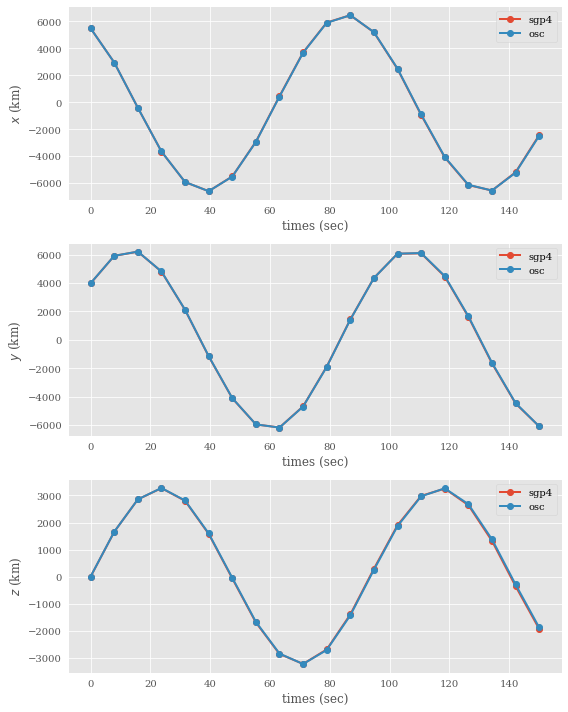

In [5]:
fig = plt.figure(figsize=(8,10))
labels = [r"$x$", r"$y$", r"$z$"]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(times, p1vals[:,i], 'o-', label='sgp4')
    plt.plot(times, p2vals[:,i], 'o-', label='osc')
    plt.legend()
    plt.xlabel("times (sec)")
    plt.ylabel(labels[i] + " (km)")
plt.tight_layout()

Now plot differences in predicted positions versus time.

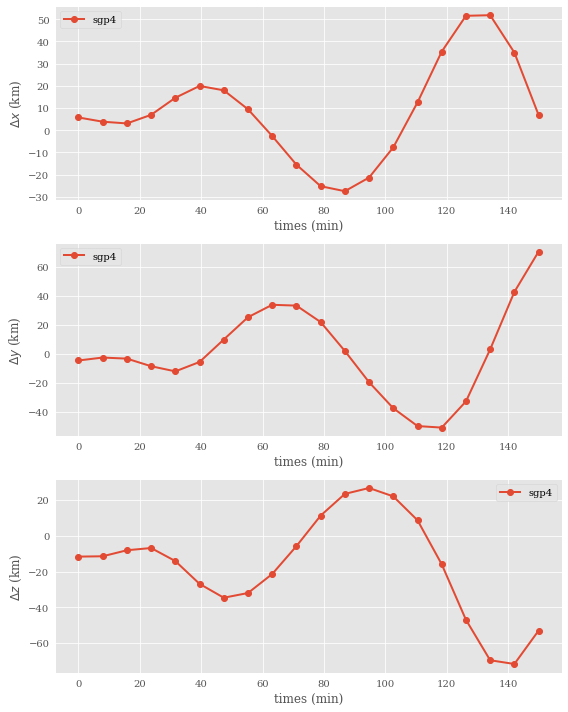

In [18]:
fig = plt.figure(figsize=(8,10))
labels = [r"$\Delta x$", r"$\Delta y$", r"$\Delta z$"]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(times, p1vals[:,i] - p2vals[:,i], 'o-', label='sgp4')
    plt.legend()
    plt.xlabel("times (min)")
    plt.ylabel(labels[i] + " (km)")
plt.tight_layout()

## From TLE

In [7]:
temp = tempfile.NamedTemporaryFile('w')
temp.write('TEST\n')
temp.write('1 88888U          80275.98708465  .00073094  13844-3  66816-4 0    8\n')
temp.write('2 88888  72.8435 115.9689 0086731  52.6988 110.5714 16.05824518  105\n')
temp.flush()

orbit = orbits.Orbit(sat_name='TEST', tle_filename=temp.name)

In [8]:
times = np.linspace(0., 150., num=20) * u.min

In [9]:
p1vals = []
p2vals = []
for i,time in enumerate(times):
    p1, _ = orbit.get_state(orbit.t0+time)
    p2, _ = orbit.get_state_osc(orbit.t0+time)
    p1vals.append(p1.value)
    p2vals.append(p2.value)
p1vals = np.array(p1vals)
p2vals = np.array(p2vals)

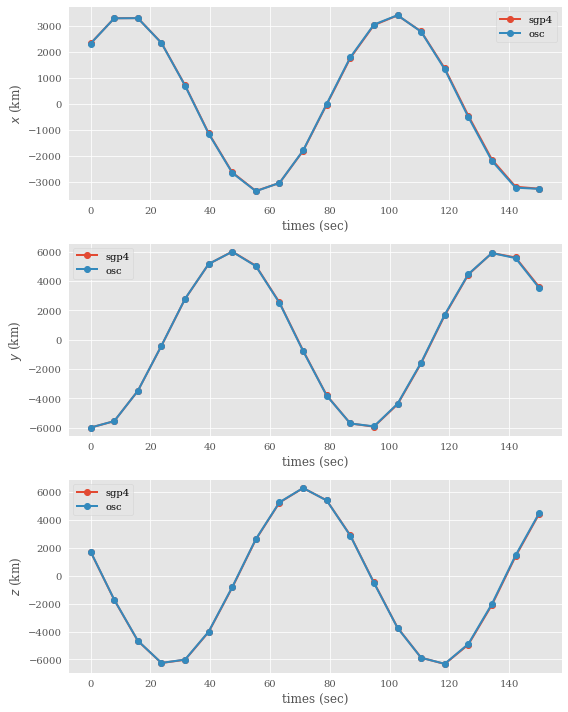

In [10]:
fig = plt.figure(figsize=(8,10))
labels = [r"$x$", r"$y$", r"$z$"]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(times, p1vals[:,i], 'o-', label='sgp4')
    plt.plot(times, p2vals[:,i], 'o-', label='osc')
    plt.legend()
    plt.xlabel("times (sec)")
    plt.ylabel(labels[i] + " (km)")
plt.tight_layout()

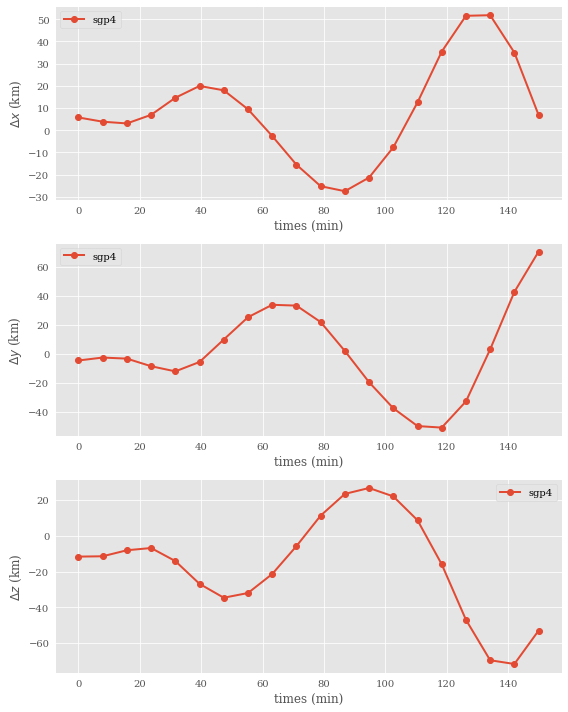

In [19]:
fig = plt.figure(figsize=(8,10))
labels = [r"$\Delta x$", r"$\Delta y$", r"$\Delta z$"]
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(times, p1vals[:,i] - p2vals[:,i], 'o-', label='sgp4')
    plt.legend()
    plt.xlabel("times (min)")
    plt.ylabel(labels[i] + " (km)")
plt.tight_layout()

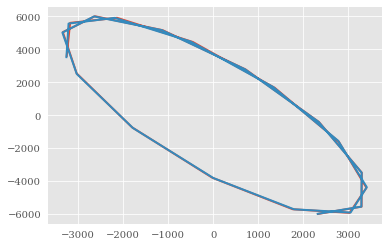

In [11]:
plt.plot(p1vals[:,0], p1vals[:,1])
plt.plot(p2vals[:,0], p2vals[:,1])

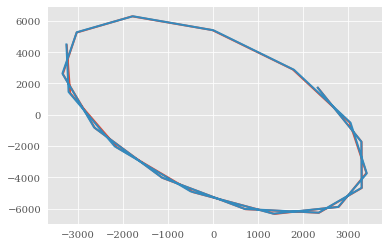

In [12]:
plt.plot(p1vals[:,0], p1vals[:,2])
plt.plot(p2vals[:,0], p2vals[:,2])

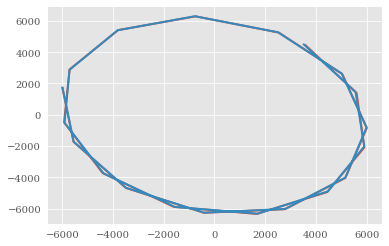

In [13]:
plt.plot(p1vals[:,1], p1vals[:,2])
plt.plot(p2vals[:,1], p2vals[:,2])

In [14]:
orbit._orbit.__dict__

{'error': 0,
 'whichconst': EarthGravity(tumin=13.446839696959309, mu=398600.8, radiusearthkm=6378.135, xke=0.07436691613317342, j2=0.001082616, j3=-2.53881e-06, j4=-1.65597e-06, j3oj2=-0.002345069720011528),
 'satnum': 88888,
 'epochdays': 275.98708465,
 'ndot': 2.2148107004387767e-09,
 'nddot': 2.913090538750181e-13,
 'bstar': 6.6816e-05,
 'inclo': 1.2713589136764896,
 'nodeo': 2.0240391349160523,
 'ecco': 0.0086731,
 'argpo': 0.9197675718499877,
 'mo': 1.929834988539658,
 'no': 0.07010615566652889,
 'a': 1.040501892439114,
 'alta': 0.04952626940242766,
 'altp': 0.031477515475800466,
 'epochyr': 1980,
 'jdsatepoch': 2444514.48708465,
 'epoch': datetime.datetime(1980, 10, 1, 23, 41, 24, 113759),
 'isimp': 1,
 'method': 'n',
 'aycof': 0.0011203600999678345,
 'con41': -0.7389556198424165,
 'cc1': 2.3338044021689716e-08,
 'cc4': 0.00037720111784279506,
 'cc5': 0.012334919185405555,
 'd2': 0.0,
 'd3': 0.0,
 'd4': 0.0,
 'delmo': 0.6963086753785733,
 'eta': 0.3234711971625582,
 'argpdot': -

In [15]:
print(orbit.mean_motion)
n0 = orbit._orbit.no / 60. * (u.rad / u.s)
print(n0)

0.0011684359277754825 rad / s
0.0011684359277754814 rad / s


In [16]:
orbit.__dict__

{'name': 'TEST',
 '_orbit': <sgp4.model.Satellite at 0x117309438>,
 'a_osc': <Quantity 6634.00997756 km>,
 'e_osc': 0.0086731,
 'arg_periapsis_osc': <Quantity 0.91976757 rad>,
 'laan_osc': <Quantity 2.02403913 rad>,
 'inclination_osc': <Quantity 1.27135891 rad>,
 'mean_anomaly_at_t0': <Quantity 1.92983499 rad>,
 't0': <Time object: scale='utc' format='jd' value=2444514.48708465>,
 'mass': <Quantity 5.97237072e+24 kg>,
 'mean_motion': <Quantity 0.00116844 rad / s>,
 'R': array([[-0.47631473,  0.18760709],
        [ 0.4420698 , -0.79342104],
        [ 0.76006485,  0.57903941]])}